In [1]:
# standard ds imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for statistical analysis
import scipy.stats as stats

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for wrangling
import wrangle
import explore
import model

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# for feature selection verification and evaluation 
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# filter out noise
import warnings
warnings.filterwarnings('ignore')

from env import host, user, password

# Project_2

## The purpose of this project is to identify key features and build a regression model to try and predict a home's tax assessed value. 

## The goal is to create 
### -Identify factors used to determine home value
### -Build a model to predict home value
### -Minimize Root Square Mean Error (RMSE) in modeling
---


# Executvie Summary:
## Goals:

### -Identify factors used to determine home value
### -Build a model to predict home value
### -Minimize Root Square Mean Error (RMSE) in modeling

## Key Findings:

### Sqft plays a factor in value
### Number of Bathroom plays a factor in Value 
### Number of Bedrooms plays a factor in Value

## Takeaways:

### All three base features impact Value the more that is higher the number of each feature the higher the value. 



## Recommendations:
 
### Evaluate other available data to gain a more focused view of how value is assessed by adding in more features such as garage, air conditioning, and location. 

---

# 1) Planning

## a)Create deliverables:
   ### - README
   ### - final_report.ipynb
   ### - working_report.ipynb

## b) Build functional wrangle.py, explore.py, and model.py files

## c) Acquire the data from the Code Up database via the wrangle.acquire functions

## d) Prepare and split the data via the wrangle.prepare functions

## e) Explore the data and define hypothesis. Run the appropriate statistical tests in order to accept or reject each null hypothesis. Document findings and takeaways.

## f) Create a baseline model in predicting home cost and document the RSME.

## g) Fit and train regression models to predict cost on the train dataset.

## i) Evaluate the models by comparing the train and validation data.

## j) Select the best model and evaluate it on the train data.

## k) Develop and document all findings, takeaways, recommendations and next steps.

---

# 2) Data Acquisition

## In this step, I called my get_zillow_mvp function from wrangle.py. This function:

### grabs the data from the CodeUp database via a SQL query

## <a name="dictionary"></a>Data Dictionary  


### Data Used
---
| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
|Area|The Sqft of the house|int64|
|Bathrooms| The Number of Bathrooms of the house |int64|
|Bedrooms| The Number of Bedrooms of the house |int64 |
|tax_value | The historical Tax Value of the house|int64|
|Sqft|the Sqft of the house broken in to 3 sizes, <1000,<2000,>2000| object|

***


In [2]:
df=wrangle.get_zillow_mvp()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52442 non-null  float64
 1   bathroomcnt                   52442 non-null  float64
 2   calculatedfinishedsquarefeet  52360 non-null  float64
 3   taxvaluedollarcnt             52441 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


---
# Acquisition Takeaways
## The zillow data brings in 4 columns of data covering 52,442 homes.
## These homes had transactions during 2017 and are tagged as Single Family Residences.
---

# 3) Data Preparation
## In this step, I called wrangle_zillow from wrangle.py. This function:

### renames columns
### handles nulls and outliers
### splits data to train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test
### makes some lame graphs 
---


In [ ]:
df=wrangle.wrangle_zillow(df)

In [5]:
train, validate, test, x_train, y_train, x_validate, y_validate, x_test, y_test=wrangle.train_validate_test(df,'tax_value')

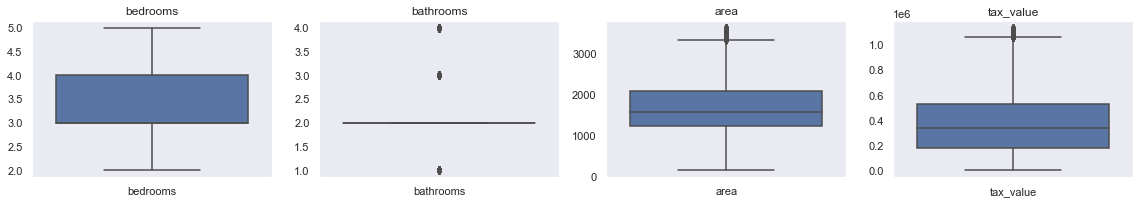

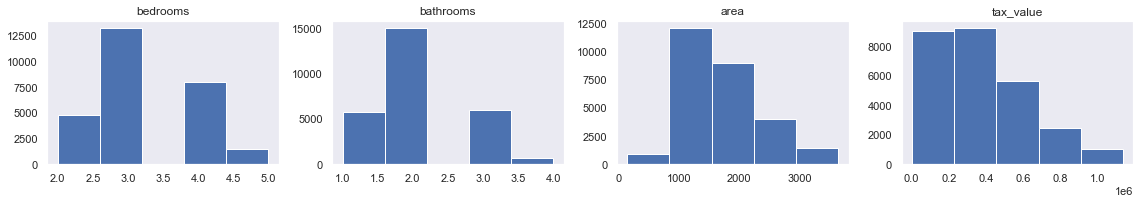

In [6]:
test=train.drop(columns=['Sqft'])
explore.get_box(test)
explore.get_hist(test)

In [7]:
cols_scale = ['bedrooms', 'bathrooms', 'area']


train_scaled, validate_scaled, test_scaled = explore.scale_data(train, validate, test, cols_scale)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

---
# 4) Data Exploration
----

In [8]:
explore.get_rmse(y_train)

RMSE Mean:
248150.10218076012
----------------
RMSE Median:
250857.8604903843


---
# Hypothesis

## alpha = .05

## $H_0$: Tax Value is independent of the Sqft of a home 

## $H_a$ : Tax Value is dependent of the Sqft of a home 

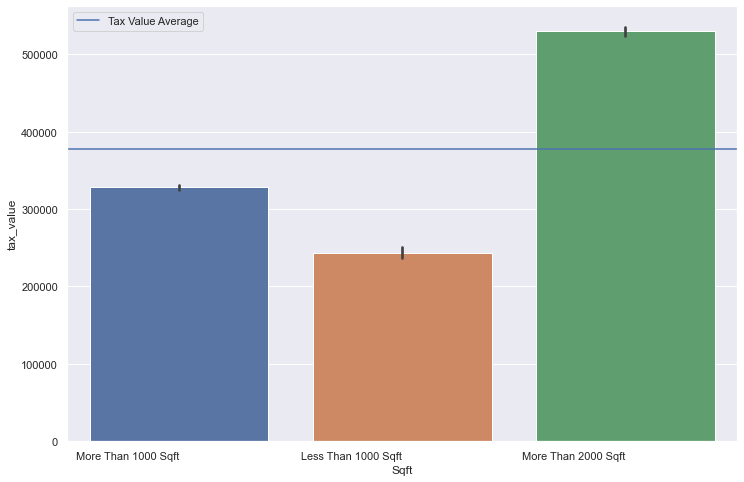

We reject the null hypothesis that The Sqft of a home and Tax Value are independent
There is a relationship between tax value and Sqft
P-Value 0.0
Chi2 64338656.93
(0.350999450994599, 0.0)


In [9]:
model.sqft_fun(train)

---

# Hypothesis

## alpha = .05

## $H_0$: Tax Value is independent of the Number of Bedrooms of a home has

## $H_a$ : Tax Value is dependent of Number of Bedrooms of a home has

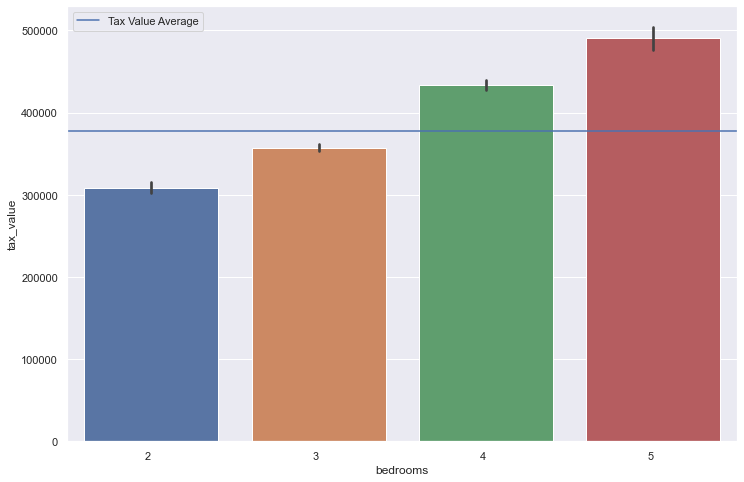

We reject the null hypothesis that The Number of Bedrooms and Tax Value are independent
There is a relationship between tax value and Number of Bedrooms
P-Value 1.2176970740433965e-07
Chi2 67028.65


In [10]:
model.bedroom_fun(train)

---
# Hypothesis

## alpha = .05

## $H_0$: Tax Value is independent of the Number of Bathrooms a home has

## $H_a$ : Tax Value is dependent of Number of Bathrooms of a home has

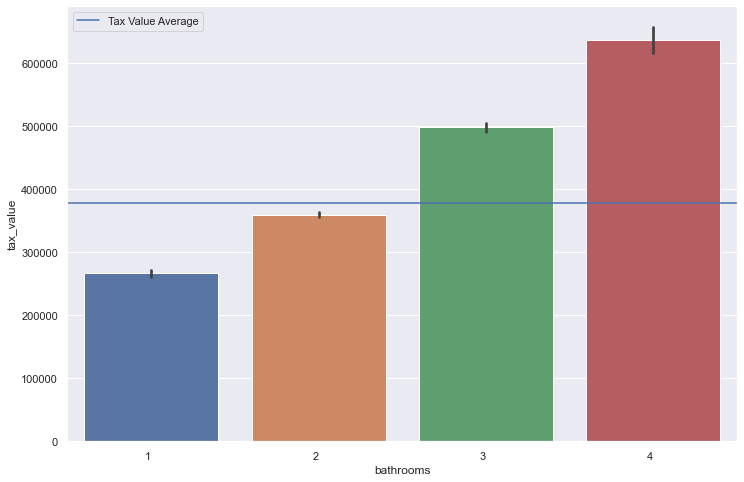

We reject the null hypothesis that The Number of Bathrooms and Tax Value are independent
There is a relationship between tax value and Number of Bathrooms
P-Value 1.5256811413305723e-29
Chi2 69283.82


In [11]:
model.bathroom_fun(train)

---
# 5) Modeling
---

In [12]:

model.evaluate_models(y_train, y_validate, x_train, x_validate, x_test)


RMSE for Lasso + Lars
Training/In-Sample:  219234.24 
Validation/Out-of-Sample:  217879.84
R2 Value: 0.22
-----------------------------------------------
RMSE for OLS using LinearRegression
Training/In-Sample:  219233.87 
Validation/Out-of-Sample:  217881.69
R2 Value: 0.22
-----------------------------------------------
RMSE for Polynomial Model, degrees=2
Training/In-Sample:  219176.92 
Validation/Out-of-Sample:  217894.86
R2 Value: 0.22


---
# 6) Conclusion

## Sqft plays a factor in value
## Number of Bathroom plays a factor in Value
## Number of Bedrooms plays a factor in Value
___